In [271]:
from ffnn.healthcheck import healthcheck
healthcheck()

Healthcheck


In [272]:
from ffnn.ffnn import FFNN
from ffnn.types import ActivationFunction, LossFunction, WeightInitializer, WeightsSetup
import numpy as np

In [273]:
# 2 node di input layer, 2 node di hidden layer, 2 node di output layer
layer_sizes = [2, 2, 2]

activation_functions = [
    ActivationFunction.SIGMOID, 
    ActivationFunction.SOFTMAX
]

loss_function = LossFunction.MEAN_SQUARED_ERROR

weights_setup = [
    WeightsSetup(initializer=WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=1),
    WeightsSetup(initializer=WeightInitializer.NORMAL, mean=0, variance=1, seed=1),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    epochs=2,
    learning_rate=0.5,
    verbose=True,
    random_state=42,
    batch_size=1
)

Layer initialized: 2 -> 2
Activation: ActivationFunction.SIGMOID
Weights setup: WeightsSetup(initializer=<WeightInitializer.UNIFORM: 2>, lower_bound=0, upper_bound=1, mean=None, variance=None, seed=42)
Weight initializer: WeightInitializer.UNIFORM

Layer initialized: 2 -> 2
Activation: ActivationFunction.SOFTMAX
Weights setup: WeightsSetup(initializer=<WeightInitializer.NORMAL: 3>, lower_bound=None, upper_bound=None, mean=0, variance=1, seed=42)
Weight initializer: WeightInitializer.NORMAL

FFNN initialized
Layer sizes: [2, 2, 2]
Activation functions: [<ActivationFunction.SIGMOID: 3>, <ActivationFunction.SOFTMAX: 5>]
Loss function: LossFunction.MEAN_SQUARED_ERROR
Weights setup: [WeightsSetup(initializer=<WeightInitializer.UNIFORM: 2>, lower_bound=0, upper_bound=1, mean=None, variance=None, seed=42), WeightsSetup(initializer=<WeightInitializer.NORMAL: 3>, lower_bound=None, upper_bound=None, mean=0, variance=1, seed=42)]
Learning rate: 0.5
Batch size: 1
Epochs: 2
Verbose: True
Random sta

In [274]:
input_data = np.array([
    [0.05, 0.1],
])

target_data = np.array([
    [0.01, 0.99],
])

model.set_weights([
    np.array([
        [0.15, 0.25],
        [0.20, 0.30],
    ]),
    np.array([
        [0.40, 0.50],
        [0.45, 0.55],
    ]),
])

model.set_biases([
    np.array([0.35, 0.35]),
    np.array([0.60, 0.60]),
])

In [275]:
model.fit(input_data, target_data)

Training...:   0%|          | 0/2 [00:00<?, ?it/s]c:\Projects\Tubes01_ML\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Projects\Tubes01_ML\.venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Training...: 100%|██████████| 2/2 [00:00<00:00, 1941.81it/s]

Epoch 1 - Training Loss: nan, Validation Loss: 0.2118587943114401
Epoch 2 - Training Loss: nan, Validation Loss: 0.2118587943114401


In [276]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import warnings 

In [277]:
# warnings.filterwarnings('ignore') 

In [278]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.eye(10)[y.astype(int)]

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
print(X_train.shape, X_test.shape)

(21000, 784) (49000, 784)


In [280]:
layer_sizes = [784, 256, 128, 10]
# layer_sizes = [784, 50, 10]
# layer_sizes = [784, 10]

activation_functions = [
    ActivationFunction.RELU,
    ActivationFunction.RELU,
    ActivationFunction.SOFTMAX,
]

loss_function = LossFunction.CATEGORICAL_CROSS_ENTROPY

weights_setup = [
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    # epochs=100,
    verbose=True,
    learning_rate=0.001,
    # batch_size=256,
    random_state=42,
    # l1_lambda=0.0001,  # L1 regularization
    # l2_lambda=0.0001,  # L2 regularization
)

Layer initialized: 784 -> 256
Activation: ActivationFunction.RELU
Weights setup: WeightsSetup(initializer=<WeightInitializer.XAVIER: 4>, lower_bound=None, upper_bound=None, mean=None, variance=None, seed=42)
Weight initializer: WeightInitializer.XAVIER

Layer initialized: 256 -> 128
Activation: ActivationFunction.RELU
Weights setup: WeightsSetup(initializer=<WeightInitializer.XAVIER: 4>, lower_bound=None, upper_bound=None, mean=None, variance=None, seed=42)
Weight initializer: WeightInitializer.XAVIER

Layer initialized: 128 -> 10
Activation: ActivationFunction.SOFTMAX
Weights setup: WeightsSetup(initializer=<WeightInitializer.XAVIER: 4>, lower_bound=None, upper_bound=None, mean=None, variance=None, seed=42)
Weight initializer: WeightInitializer.XAVIER

FFNN initialized
Layer sizes: [784, 256, 128, 10]
Activation functions: [<ActivationFunction.RELU: 2>, <ActivationFunction.RELU: 2>, <ActivationFunction.SOFTMAX: 5>]
Loss function: LossFunction.CATEGORICAL_CROSS_ENTROPY
Weights setup: [

In [281]:
model.fit(X_train, y_train)

Training...:   1%|          | 1/100 [00:00<01:01,  1.60it/s]

Epoch 1 - Training Loss: 6.4214193366334165, Validation Loss: 2.8800508829991953


Training...:   2%|▏         | 2/100 [00:01<00:59,  1.64it/s]

Epoch 2 - Training Loss: 2.0784687690606054, Validation Loss: 1.7564913108435436


Training...:   3%|▎         | 3/100 [00:01<00:57,  1.68it/s]

Epoch 3 - Training Loss: 1.2732289905210745, Validation Loss: 1.2305287938775435


Training...:   4%|▍         | 4/100 [00:02<00:55,  1.73it/s]

Epoch 4 - Training Loss: 0.975146200070226, Validation Loss: 1.0309238884204632


Training...:   5%|▌         | 5/100 [00:02<00:54,  1.73it/s]

Epoch 5 - Training Loss: 0.8068103228769801, Validation Loss: 1.0524119525737787


Training...:   6%|▌         | 6/100 [00:03<00:54,  1.73it/s]

Epoch 6 - Training Loss: 0.7311013341128529, Validation Loss: 0.8143887226927023


Training...:   7%|▋         | 7/100 [00:04<00:53,  1.72it/s]

Epoch 7 - Training Loss: 0.6440388214250543, Validation Loss: 0.6002852199785286


Training...:   8%|▊         | 8/100 [00:04<00:53,  1.72it/s]

Epoch 8 - Training Loss: 0.5639940798053703, Validation Loss: 0.5623312462929669


Training...:   9%|▉         | 9/100 [00:05<00:52,  1.74it/s]

Epoch 9 - Training Loss: 0.4816315243281755, Validation Loss: 0.44764116556465755


Training...:  10%|█         | 10/100 [00:05<00:51,  1.75it/s]

Epoch 10 - Training Loss: 0.4353768970471598, Validation Loss: 0.6016526079018746


Training...:  11%|█         | 11/100 [00:06<00:51,  1.74it/s]

Epoch 11 - Training Loss: 0.392799893800869, Validation Loss: 0.5062075778806302


Training...:  12%|█▏        | 12/100 [00:06<00:50,  1.75it/s]

Epoch 12 - Training Loss: 0.3640711972834938, Validation Loss: 0.6896710438879153


Training...:  13%|█▎        | 13/100 [00:07<00:50,  1.71it/s]

Epoch 13 - Training Loss: 0.3602511477236825, Validation Loss: 0.39104811996122235


Training...:  14%|█▍        | 14/100 [00:08<00:51,  1.66it/s]

Epoch 14 - Training Loss: 0.34847763107227103, Validation Loss: 0.5896715921713706


Training...:  15%|█▌        | 15/100 [00:08<00:50,  1.67it/s]

Epoch 15 - Training Loss: 0.3189090508813284, Validation Loss: 0.3708765235763318


Training...:  16%|█▌        | 16/100 [00:09<00:50,  1.68it/s]

Epoch 16 - Training Loss: 0.28241223530442244, Validation Loss: 0.26492476455952146


Training...:  17%|█▋        | 17/100 [00:09<00:48,  1.71it/s]

Epoch 17 - Training Loss: 0.25826401171962055, Validation Loss: 0.13333284347599408


Training...:  18%|█▊        | 18/100 [00:10<00:47,  1.71it/s]

Epoch 18 - Training Loss: 0.3101068449183453, Validation Loss: 0.2122427588095037


Training...:  19%|█▉        | 19/100 [00:11<00:47,  1.72it/s]

Epoch 19 - Training Loss: 0.2549115282005531, Validation Loss: 0.32716492448683027


Training...:  20%|██        | 20/100 [00:11<00:47,  1.68it/s]

Epoch 20 - Training Loss: 0.25257810252105406, Validation Loss: 0.38790931492284647


Training...:  21%|██        | 21/100 [00:12<00:46,  1.68it/s]

Epoch 21 - Training Loss: 0.1976043055494431, Validation Loss: 0.16695809390865599


Training...:  22%|██▏       | 22/100 [00:12<00:46,  1.69it/s]

Epoch 22 - Training Loss: 0.18060063504205612, Validation Loss: 0.23452032853189128


Training...:  23%|██▎       | 23/100 [00:13<00:45,  1.69it/s]

Epoch 23 - Training Loss: 0.1912357952498373, Validation Loss: 0.4131184001734128


Training...:  24%|██▍       | 24/100 [00:14<00:45,  1.67it/s]

Epoch 24 - Training Loss: 0.15677778643976303, Validation Loss: 0.1444811734049143


Training...:  25%|██▌       | 25/100 [00:14<00:45,  1.66it/s]

Epoch 25 - Training Loss: 0.1825084718705101, Validation Loss: 0.28410821066970027


Training...:  26%|██▌       | 26/100 [00:15<00:43,  1.69it/s]

Epoch 26 - Training Loss: 0.18060555452683466, Validation Loss: 0.11011019203506242


Training...:  27%|██▋       | 27/100 [00:15<00:42,  1.70it/s]

Epoch 27 - Training Loss: 0.14132304645252425, Validation Loss: 0.10693238780832767


Training...:  28%|██▊       | 28/100 [00:16<00:42,  1.71it/s]

Epoch 28 - Training Loss: 0.12516884326877414, Validation Loss: 0.1764890214605527


Training...:  29%|██▉       | 29/100 [00:17<00:41,  1.70it/s]

Epoch 29 - Training Loss: 0.1266552342594657, Validation Loss: 0.17078834152094188


Training...:  30%|███       | 30/100 [00:17<00:41,  1.69it/s]

Epoch 30 - Training Loss: 0.10667531462060331, Validation Loss: 0.1511722887668819


Training...:  31%|███       | 31/100 [00:18<00:40,  1.71it/s]

Epoch 31 - Training Loss: 0.09843605699338846, Validation Loss: 0.1694540417569379


Training...:  32%|███▏      | 32/100 [00:18<00:39,  1.72it/s]

Epoch 32 - Training Loss: 0.10525446493003335, Validation Loss: 0.1596455641670678


Training...:  33%|███▎      | 33/100 [00:19<00:38,  1.73it/s]

Epoch 33 - Training Loss: 0.08298453889984599, Validation Loss: 0.12250147028230932


Training...:  34%|███▍      | 34/100 [00:19<00:38,  1.73it/s]

Epoch 34 - Training Loss: 0.07634746712633564, Validation Loss: 0.15653797506991943


Training...:  35%|███▌      | 35/100 [00:20<00:37,  1.73it/s]

Epoch 35 - Training Loss: 0.08406461806631461, Validation Loss: 0.3410972815008604


Training...:  36%|███▌      | 36/100 [00:21<00:37,  1.72it/s]

Epoch 36 - Training Loss: 0.08906698987429516, Validation Loss: 0.07729265071048362


Training...:  37%|███▋      | 37/100 [00:21<00:36,  1.71it/s]

Epoch 37 - Training Loss: 0.04956852064879622, Validation Loss: 0.07051363164599517


Training...:  38%|███▊      | 38/100 [00:22<00:36,  1.70it/s]

Epoch 38 - Training Loss: 0.05337128142426796, Validation Loss: 0.1408028014366859


Training...:  39%|███▉      | 39/100 [00:22<00:36,  1.69it/s]

Epoch 39 - Training Loss: 0.050881523478770514, Validation Loss: 0.11395806175683057


Training...:  40%|████      | 40/100 [00:23<00:35,  1.70it/s]

Epoch 40 - Training Loss: 0.05905215148513847, Validation Loss: 0.06274787966299604


Training...:  41%|████      | 41/100 [00:24<00:34,  1.69it/s]

Epoch 41 - Training Loss: 0.02871472924433789, Validation Loss: 0.10444807293750928


Training...:  42%|████▏     | 42/100 [00:24<00:33,  1.71it/s]

Epoch 42 - Training Loss: 0.06299973410998234, Validation Loss: 0.01811976589784961


Training...:  43%|████▎     | 43/100 [00:25<00:33,  1.72it/s]

Epoch 43 - Training Loss: 0.03530002746763347, Validation Loss: 0.040480233525421246


Training...:  44%|████▍     | 44/100 [00:25<00:32,  1.73it/s]

Epoch 44 - Training Loss: 0.019378793160550033, Validation Loss: 0.03868889974877157


Training...:  45%|████▌     | 45/100 [00:26<00:31,  1.73it/s]

Epoch 45 - Training Loss: 0.033889884784878414, Validation Loss: 0.03317706596300739


Training...:  46%|████▌     | 46/100 [00:26<00:31,  1.71it/s]

Epoch 46 - Training Loss: 0.02941419429144559, Validation Loss: 0.04767900457426715


Training...:  47%|████▋     | 47/100 [00:27<00:31,  1.70it/s]

Epoch 47 - Training Loss: 0.02011069843232727, Validation Loss: 0.022561834455292917


Training...:  48%|████▊     | 48/100 [00:28<00:30,  1.71it/s]

Epoch 48 - Training Loss: 0.024106346881131183, Validation Loss: 0.07140823351742438


Training...:  49%|████▉     | 49/100 [00:28<00:29,  1.71it/s]

Epoch 49 - Training Loss: 0.028476896907914058, Validation Loss: 0.00890533417521735


Training...:  50%|█████     | 50/100 [00:29<00:29,  1.68it/s]

Epoch 50 - Training Loss: 0.0385949108951325, Validation Loss: 0.02606054505613772


Training...:  51%|█████     | 51/100 [00:29<00:29,  1.67it/s]

Epoch 51 - Training Loss: 0.0386052896358946, Validation Loss: 0.048824120886173356


Training...:  52%|█████▏    | 52/100 [00:30<00:28,  1.67it/s]

Epoch 52 - Training Loss: 0.023370897410284815, Validation Loss: 0.04066292050810605


Training...:  53%|█████▎    | 53/100 [00:31<00:27,  1.71it/s]

Epoch 53 - Training Loss: 0.02434662683203445, Validation Loss: 0.03539438899933252


Training...:  54%|█████▍    | 54/100 [00:31<00:26,  1.71it/s]

Epoch 54 - Training Loss: 0.02781020565491225, Validation Loss: 0.015585199839934165


Training...:  55%|█████▌    | 55/100 [00:32<00:26,  1.73it/s]

Epoch 55 - Training Loss: 0.037789364770214336, Validation Loss: 0.10173226543344668


Training...:  56%|█████▌    | 56/100 [00:32<00:25,  1.69it/s]

Epoch 56 - Training Loss: 0.030761375084036098, Validation Loss: 0.051711292184567235


Training...:  57%|█████▋    | 57/100 [00:33<00:25,  1.68it/s]

Epoch 57 - Training Loss: 0.02595011109850918, Validation Loss: 0.023836195643635424


Training...:  58%|█████▊    | 58/100 [00:34<00:25,  1.68it/s]

Epoch 58 - Training Loss: 0.043969487113726904, Validation Loss: 0.014787376436351196


Training...:  59%|█████▉    | 59/100 [00:34<00:24,  1.70it/s]

Epoch 59 - Training Loss: 0.03702127054943914, Validation Loss: 0.005772218889205127


Training...:  60%|██████    | 60/100 [00:35<00:23,  1.71it/s]

Epoch 60 - Training Loss: 0.009150103177732035, Validation Loss: 4.2151483772738635e-05


Training...:  61%|██████    | 61/100 [00:35<00:22,  1.70it/s]

Epoch 61 - Training Loss: 0.006476216345221194, Validation Loss: 0.002619479916871512


Training...:  62%|██████▏   | 62/100 [00:36<00:22,  1.70it/s]

Epoch 62 - Training Loss: 0.027776041772838263, Validation Loss: 0.012677878694751087


Training...:  63%|██████▎   | 63/100 [00:36<00:21,  1.71it/s]

Epoch 63 - Training Loss: 0.014195330777479701, Validation Loss: 0.04623314473042312


Training...:  64%|██████▍   | 64/100 [00:37<00:20,  1.72it/s]

Epoch 64 - Training Loss: 0.020826992006236295, Validation Loss: 0.021395325937448813


Training...:  65%|██████▌   | 65/100 [00:38<00:20,  1.74it/s]

Epoch 65 - Training Loss: 0.032993672832957684, Validation Loss: 0.01254926784531296


Training...:  66%|██████▌   | 66/100 [00:38<00:19,  1.73it/s]

Epoch 66 - Training Loss: 0.00975255882341147, Validation Loss: 0.022235477573627507


Training...:  67%|██████▋   | 67/100 [00:39<00:19,  1.73it/s]

Epoch 67 - Training Loss: 0.011463339766752303, Validation Loss: 0.010749544073651088


Training...:  68%|██████▊   | 68/100 [00:39<00:18,  1.70it/s]

Epoch 68 - Training Loss: 0.018507394983855313, Validation Loss: 0.02253138504944907


Training...:  69%|██████▉   | 69/100 [00:40<00:18,  1.70it/s]

Epoch 69 - Training Loss: 0.01712599223232379, Validation Loss: 0.013916816254457572


Training...:  70%|███████   | 70/100 [00:41<00:17,  1.71it/s]

Epoch 70 - Training Loss: 0.013067100464712482, Validation Loss: 0.002067333585574607


Training...:  71%|███████   | 71/100 [00:41<00:17,  1.71it/s]

Epoch 71 - Training Loss: 0.00943161167396466, Validation Loss: 0.045758723340888194


Training...:  72%|███████▏  | 72/100 [00:42<00:16,  1.72it/s]

Epoch 72 - Training Loss: 0.012036796561825987, Validation Loss: 0.017979902566861453


Training...:  73%|███████▎  | 73/100 [00:42<00:15,  1.73it/s]

Epoch 73 - Training Loss: 0.01508266111741809, Validation Loss: 0.03879070557640424


Training...:  74%|███████▍  | 74/100 [00:43<00:14,  1.75it/s]

Epoch 74 - Training Loss: 0.012100226972376879, Validation Loss: 0.02639861221172935


Training...:  75%|███████▌  | 75/100 [00:43<00:14,  1.74it/s]

Epoch 75 - Training Loss: 0.017050733845133437, Validation Loss: 0.01838225647395727


Training...:  76%|███████▌  | 76/100 [00:44<00:13,  1.73it/s]

Epoch 76 - Training Loss: 0.01363801563175311, Validation Loss: 0.013031901909280172


Training...:  77%|███████▋  | 77/100 [00:45<00:13,  1.69it/s]

Epoch 77 - Training Loss: 0.013646485911284548, Validation Loss: 0.03660851919833022


Training...:  78%|███████▊  | 78/100 [00:45<00:12,  1.70it/s]

Epoch 78 - Training Loss: 0.009651311394946726, Validation Loss: 0.003200905690350046


Training...:  79%|███████▉  | 79/100 [00:46<00:12,  1.68it/s]

Epoch 79 - Training Loss: 0.008715259720303487, Validation Loss: 0.007250456710054635


Training...:  80%|████████  | 80/100 [00:46<00:11,  1.70it/s]

Epoch 80 - Training Loss: 0.0075628257916838405, Validation Loss: 0.007779702049981761


Training...:  81%|████████  | 81/100 [00:47<00:11,  1.69it/s]

Epoch 81 - Training Loss: 0.01002000342551317, Validation Loss: 0.002174115882855573


Training...:  82%|████████▏ | 82/100 [00:48<00:10,  1.69it/s]

Epoch 82 - Training Loss: 0.0004263429683833376, Validation Loss: 0.014675740958626749


Training...:  83%|████████▎ | 83/100 [00:48<00:10,  1.68it/s]

Epoch 83 - Training Loss: 0.007175941737883837, Validation Loss: 0.0010599848691540345


Training...:  84%|████████▍ | 84/100 [00:49<00:09,  1.70it/s]

Epoch 84 - Training Loss: 0.001262794058092289, Validation Loss: 9.344590380323027e-07


Training...:  85%|████████▌ | 85/100 [00:49<00:08,  1.71it/s]

Epoch 85 - Training Loss: 2.2900590766744331e-07, Validation Loss: 3.329643713623892e-06


Training...:  86%|████████▌ | 86/100 [00:50<00:08,  1.73it/s]

Epoch 86 - Training Loss: 0.0021369871217199483, Validation Loss: 3.232016156794321e-08


Training...:  87%|████████▋ | 87/100 [00:50<00:07,  1.72it/s]

Epoch 87 - Training Loss: 0.00013840917345272783, Validation Loss: 0.0008733671464438506


Training...:  88%|████████▊ | 88/100 [00:51<00:06,  1.72it/s]

Epoch 88 - Training Loss: 2.526381193465153e-06, Validation Loss: 1.9895508852751866e-08


Training...:  89%|████████▉ | 89/100 [00:52<00:06,  1.72it/s]

Epoch 89 - Training Loss: 7.655769550282002e-09, Validation Loss: 1.2920264371597803e-08


Training...:  90%|█████████ | 90/100 [00:52<00:05,  1.72it/s]

Epoch 90 - Training Loss: 8.18314268866796e-09, Validation Loss: 1.5246645546598058e-09


Training...:  91%|█████████ | 91/100 [00:53<00:05,  1.71it/s]

Epoch 91 - Training Loss: 5.945424417951013e-09, Validation Loss: 4.628189557295595e-09


Training...:  92%|█████████▏| 92/100 [00:53<00:04,  1.73it/s]

Epoch 92 - Training Loss: 5.064297221235873e-09, Validation Loss: 5.7121112905442445e-09


Training...:  93%|█████████▎| 93/100 [00:54<00:04,  1.73it/s]

Epoch 93 - Training Loss: 3.376129860995483e-09, Validation Loss: 1.017752889150107e-08


Training...:  94%|█████████▍| 94/100 [00:55<00:03,  1.74it/s]

Epoch 94 - Training Loss: 5.533609264209213e-09, Validation Loss: 8.436700778711753e-10


Training...:  95%|█████████▌| 95/100 [00:55<00:02,  1.74it/s]

Epoch 95 - Training Loss: 2.9864836205449865e-09, Validation Loss: 9.245769112729727e-09


Training...:  96%|█████████▌| 96/100 [00:56<00:02,  1.75it/s]

Epoch 96 - Training Loss: 4.024930205714584e-09, Validation Loss: 4.1645923446835194e-09


Training...:  97%|█████████▋| 97/100 [00:56<00:01,  1.74it/s]

Epoch 97 - Training Loss: 3.477240589560604e-09, Validation Loss: 5.543889370751775e-09


Training...:  98%|█████████▊| 98/100 [00:57<00:01,  1.73it/s]

Epoch 98 - Training Loss: 4.542517920082112e-09, Validation Loss: 2.2356404576677963e-10


Training...:  99%|█████████▉| 99/100 [00:57<00:00,  1.72it/s]

Epoch 99 - Training Loss: 2.4180158008655463e-09, Validation Loss: 7.802912673230772e-09


Training...: 100%|██████████| 100/100 [00:58<00:00,  1.71it/s]

Epoch 100 - Training Loss: 3.3795223233852862e-09, Validation Loss: 3.272722080144398e-09


In [282]:
y_pred = model.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.69%


In [283]:
import pandas as pd

In [284]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,4.058122e-162,5.403369e-105,7.949087e-177,5.344864e-103,3.568201e-106,7.579389e-57,1.394900e-167,1.153933e-90,6.929869e-99
1,5.066374e-217,1.767797e-160,6.129196e-135,2.915788e-180,1.000000e+00,2.305057e-123,1.500410e-161,5.482562e-130,7.602335e-114,6.936675e-87
2,4.714323e-172,1.000000e+00,5.781387e-130,3.690352e-111,4.987569e-87,2.815415e-87,6.785330e-129,3.053028e-89,8.804494e-88,2.117364e-90
3,8.076670e-68,2.931467e-159,1.000000e+00,6.317491e-107,1.811486e-159,1.661234e-155,2.688599e-156,1.262706e-195,6.175274e-106,2.259168e-101
4,2.730952e-79,2.762975e-100,8.850044e-75,2.103303e-97,5.724083e-03,3.711948e-62,4.205330e-66,9.942759e-01,1.071609e-104,2.563196e-37


In [285]:
y_true_df = pd.DataFrame(y_true)
y_true_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


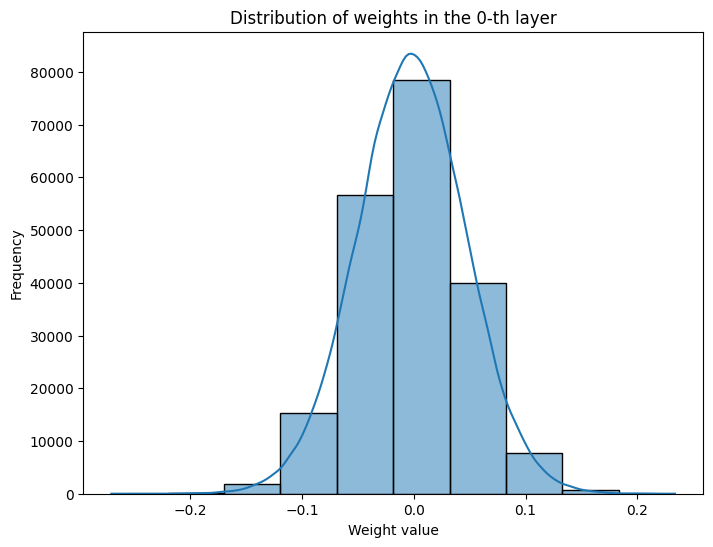

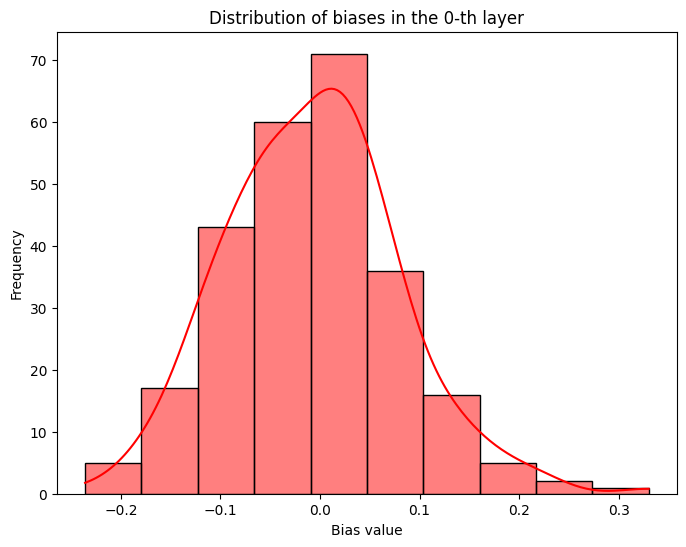

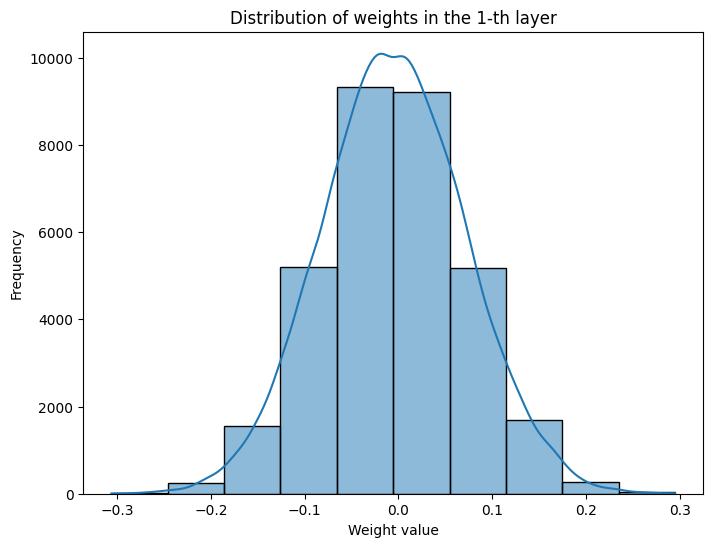

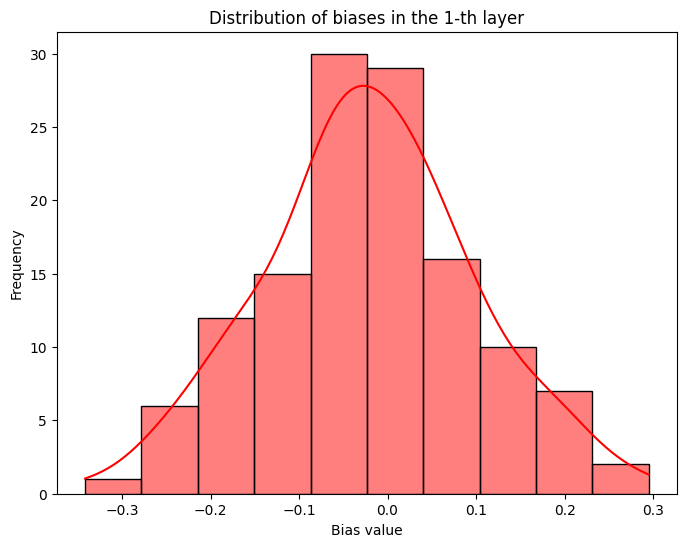

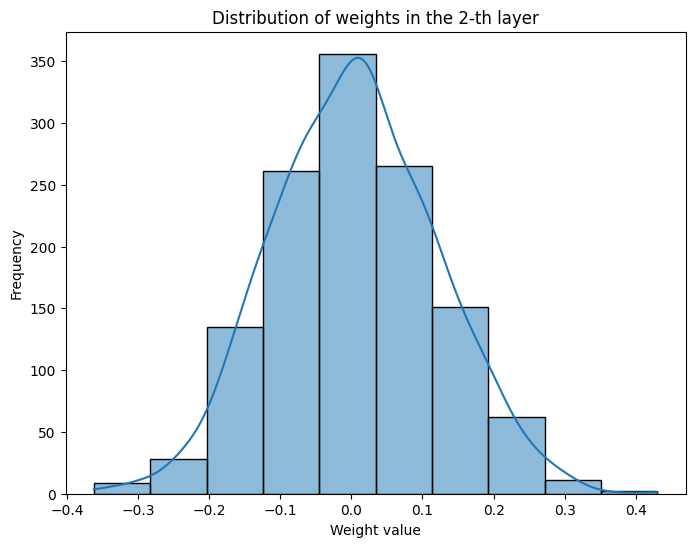

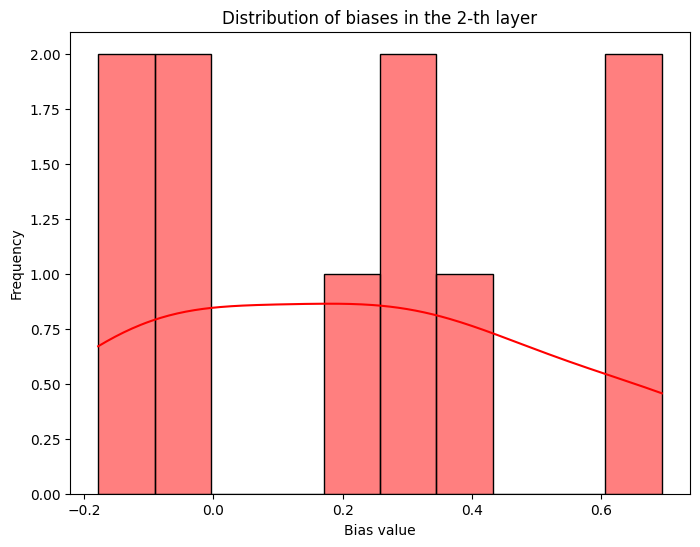

In [286]:
model.plot_weights([i for i in range(len(layer_sizes) - 1)])

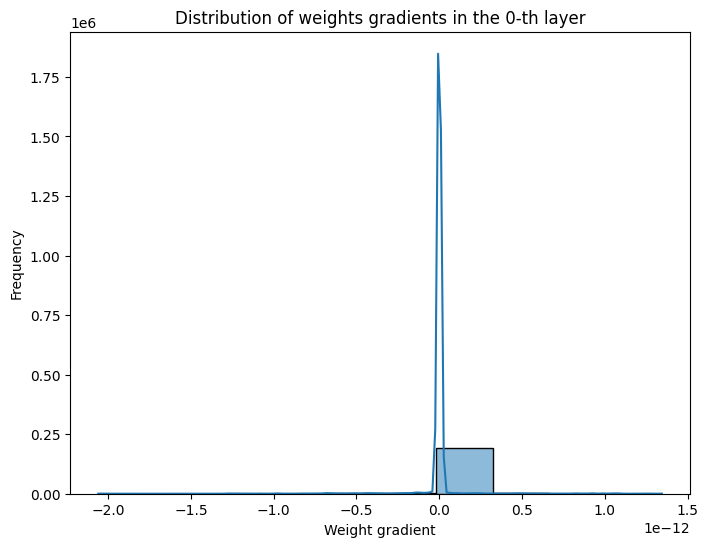

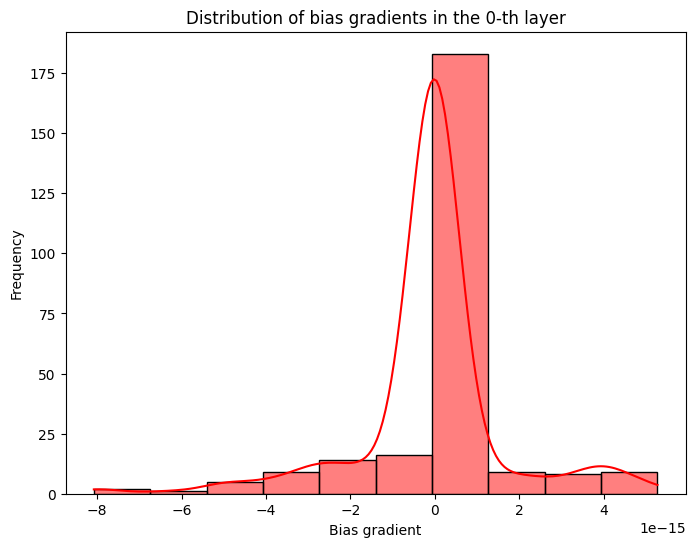

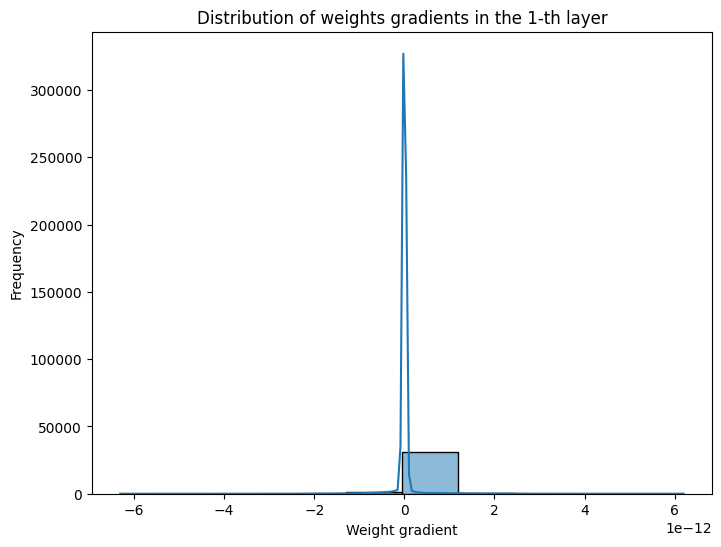

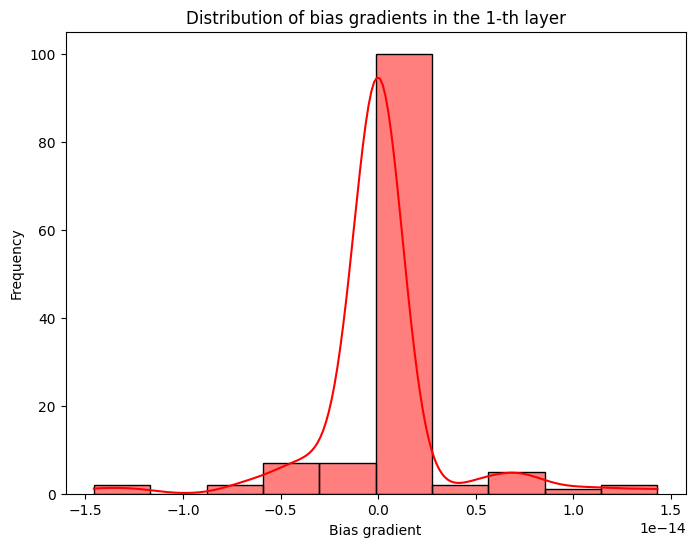

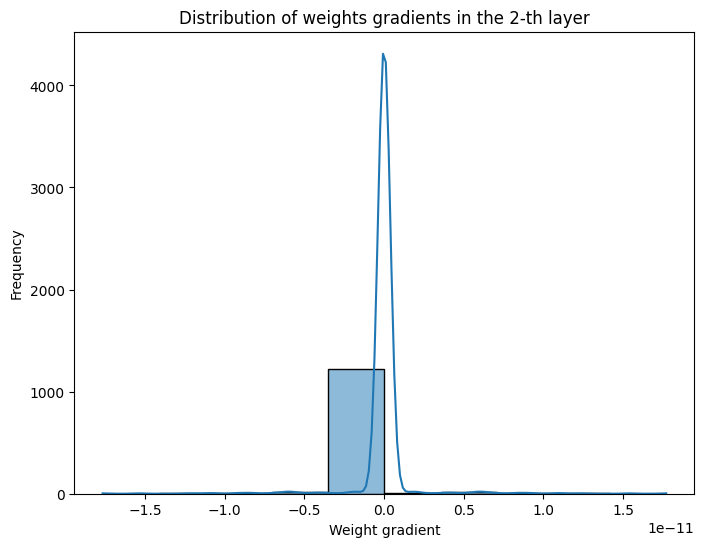

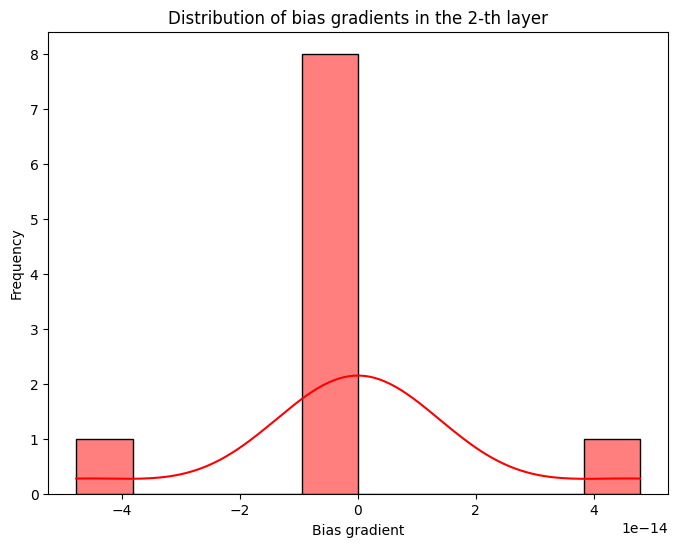

In [287]:
model.plot_gradients([i for i in range(len(layer_sizes) - 1)])

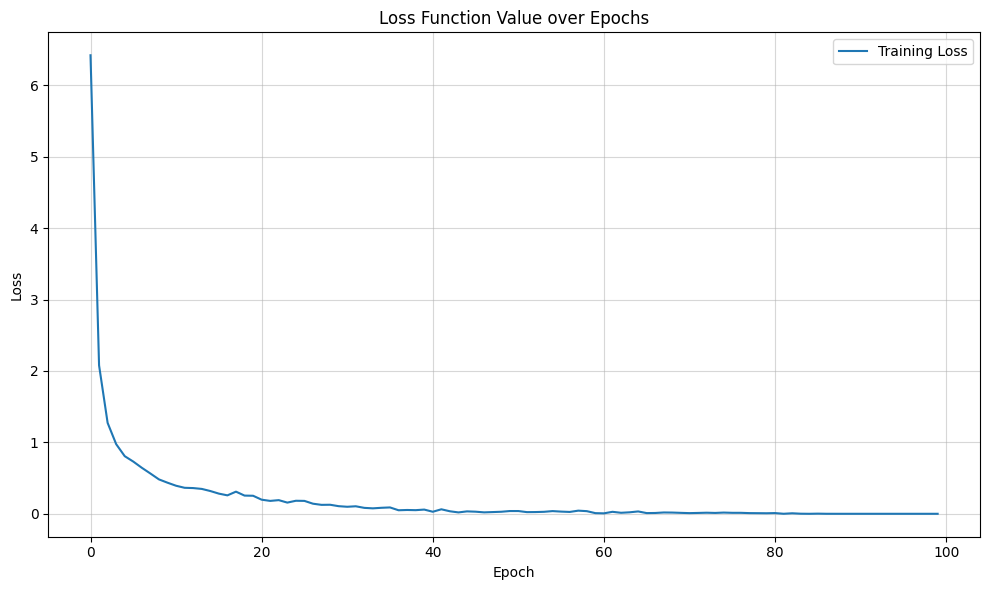

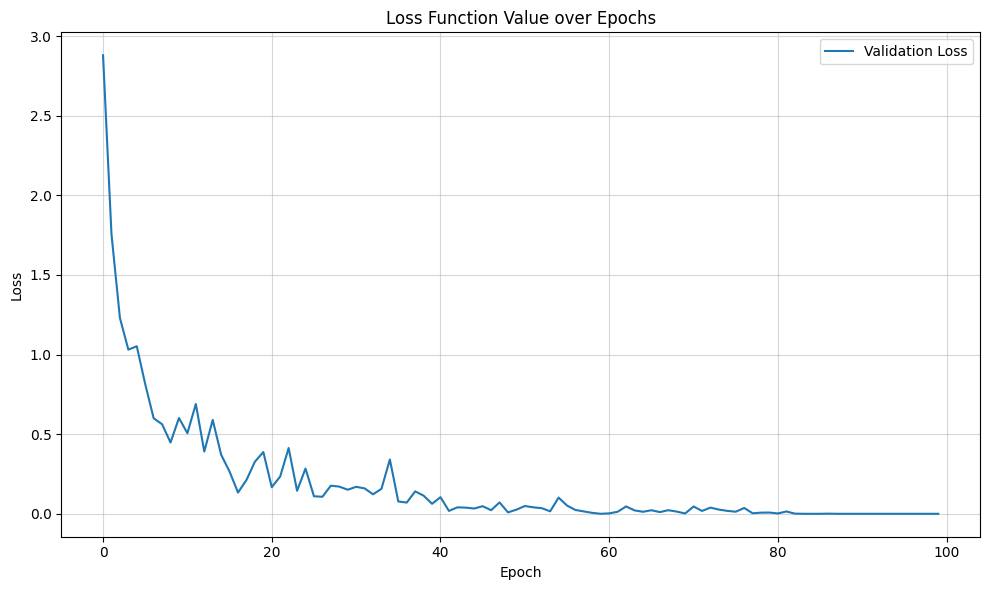

In [288]:
model.plot_loss_curve()